/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 39'. Pick better value with 'binwidth'.


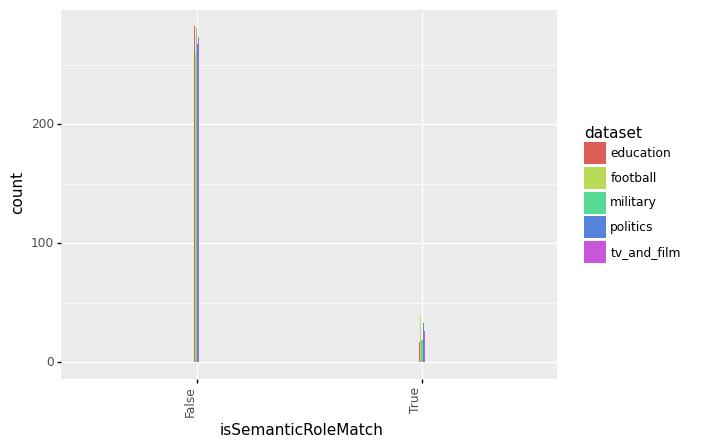

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


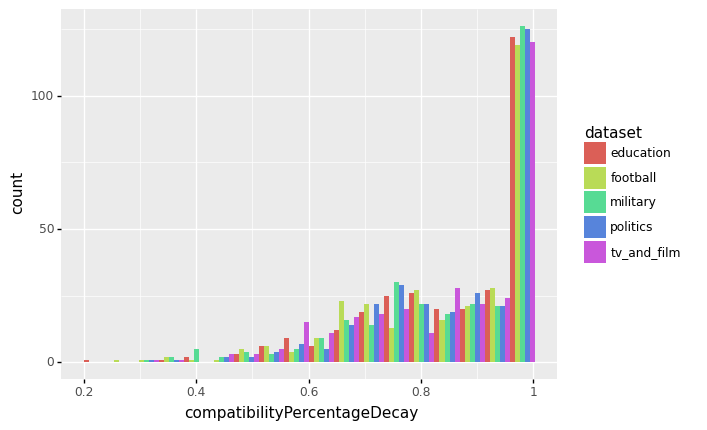


tv_and_film Positive Rate:  0.08695652173913043
tv_and_film Positive Counts/Rate in Compatible (with Decay):  20 / 98 0.20408163265306123
tv_and_film Counts/Percentage of Semantic Being Compatible (with Decay):  20 / 26 0.7692307692307693
tv_and_film Positive Counts/Rate in Compatible (without Decay):  18 / 56 0.32142857142857145
tv_and_film Counts/Percentage of Semantic Being Compatible (without Decay):  18 / 26 0.6923076923076923
education Positive Rate:  0.056856187290969896
education Positive Counts/Rate in Compatible (with Decay):  15 / 100 0.15
education Counts/Percentage of Semantic Being Compatible (with Decay):  15 / 17 0.8823529411764706
education Positive Counts/Rate in Compatible (without Decay):  12 / 50 0.24
education Counts/Percentage of Semantic Being Compatible (without Decay):  12 / 17 0.7058823529411765
football Positive Rate:  0.13043478260869565
football Positive Counts/Rate in Compatible (with Decay):  37 / 99 0.37373737373737376
football Counts/Percentage of Sem

In [17]:
import pandas as pd
from plotnine import *
from plotnine.data import *
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

df = pd.read_csv("localData/semanticAnnotation/results.csv")


def getGroup(x):
    if(x==1.0):
        return "[1.0,1.0] (full)"
    elif(x >=0.8):
        return "[0.8,1.0) (80%)"
    else:
        return "[0.0,0.8) (<80%)"


df['groupDecay'] = df['compatibilityPercentageDecay'].map(lambda x: getGroup(x))
df['groupNoDecay'] = df['compatibilityPercentageNoDecay'].map(lambda x: getGroup(x))

#print(df.describe())
plot = ggplot(df,aes(x = 'isSemanticRoleMatch',fill="dataset",group='dataset')) + geom_histogram(position=position_dodge()) + theme(axis_text_x = element_text(angle=90, hjust=1))
print(plot)
plot = ggplot(df,aes(x = 'compatibilityPercentageDecay',fill="dataset")) + geom_histogram(position=position_dodge())
print(plot)

for dsName in df.dataset.unique():
    thisDF = df[df['dataset']==dsName]
    print(dsName,"Positive Rate: ", sum(thisDF['isSemanticRoleMatch']) / len(thisDF.index) )
    print(dsName,"Positive Counts/Rate in Compatible (with Decay): ",sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingDecay']), "/", sum(thisDF['isInStrictBlockingDecay']),sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingDecay']) / sum(thisDF['isInStrictBlockingDecay']) )

    print(dsName,"Counts/Percentage of Semantic Being Compatible (with Decay): ",sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingDecay']),"/",sum(thisDF['isSemanticRoleMatch']), sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingDecay']) / sum(thisDF['isSemanticRoleMatch']) )
    print(dsName,"Positive Counts/Rate in Compatible (without Decay): ",sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingNoDecay']),"/",sum(thisDF['isInStrictBlockingNoDecay']), sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingNoDecay']) / sum(thisDF['isInStrictBlockingNoDecay']) )
    print(dsName,"Counts/Percentage of Semantic Being Compatible (without Decay): ",sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingNoDecay']),"/",sum(thisDF['isSemanticRoleMatch']), sum(thisDF['isSemanticRoleMatch'] & thisDF['isInStrictBlockingNoDecay']) / sum(thisDF['isSemanticRoleMatch']) )

# Tabular Overview over True Semantic Matches

In [18]:
print("For Decay:")
tab = df.groupby(['dataset', 'isSemanticRoleMatch','groupDecay']).size()
print(tab)
print("For No Decay:")
tab = df.groupby(['dataset', 'isSemanticRoleMatch','groupNoDecay']).size()
print(tab)

For Decay:
dataset      isSemanticRoleMatch  groupDecay      
education    False                [0.0,0.8) (<80%)    100
                                  [0.8,1.0) (80%)      97
                                  [1.0,1.0] (full)     85
             True                 [0.8,1.0) (80%)       2
                                  [1.0,1.0] (full)     15
football     False                [0.0,0.8) (<80%)    100
                                  [0.8,1.0) (80%)      98
                                  [1.0,1.0] (full)     62
             True                 [0.8,1.0) (80%)       2
                                  [1.0,1.0] (full)     37
military     False                [0.0,0.8) (<80%)     99
                                  [0.8,1.0) (80%)      97
                                  [1.0,1.0] (full)     85
             True                 [0.0,0.8) (<80%)      1
                                  [0.8,1.0) (80%)       3
                                  [1.0,1.0] (full)     15
politics  

# Tabular Overview over True Semantic Matches Sorted by Compatibility

In [11]:
dfTruePositives = df[df['isSemanticRoleMatch']]
#For Decay:
dfTruePositives.sort_values('compatibilityPercentageDecay',inplace=True)
print(tabulate(dfTruePositives, headers='keys', tablefmt='psql'))
#Total:
print(sum(df['isSemanticRoleMatch']))
print(sum(df['isSemanticRoleMatch'] & df['isInStrictBlockingDecay']))
# For No Decay:
dfTruePositives.sort_values('compatibilityPercentageNoDecay',inplace=True)
print(tabulate(dfTruePositives, headers='keys', tablefmt='psql'))
#Total:
print(sum(df['isSemanticRoleMatch']))
print(sum(df['isSemanticRoleMatch'] & df['isInStrictBlockingNoDecay']))


+------+-------------+---------------------------+-----------------------------+-----------------------+--------------------------------+----------------------------------+--------------+----------------+
|      | dataset     | isInStrictBlockingDecay   | isInStrictBlockingNoDecay   | isSemanticRoleMatch   |   compatibilityPercentageDecay |   compatibilityPercentageNoDecay | groupDecay   | groupNoDecay   |
|------+-------------+---------------------------+-----------------------------+-----------------------+--------------------------------+----------------------------------+--------------+----------------|
|  951 | politics    | False                     | False                       | True                  |                       0.520115 |                         0.501437 | [0.0,0.8)    | [0.0,0.8)      |
| 1109 | politics    | False                     | False                       | True                  |                       0.525862 |                         0.525862 | [0.0,0.

/tmp/ipykernel_22539/945213557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_22539/945213557.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Recall Plots

No Single true role match for below (with decay)  0.5201149425287356 found in  49 elements
No Single true role match for below (without decay)  0.2816091954022988 found in  20 elements


/tmp/ipykernel_22539/4074180442.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


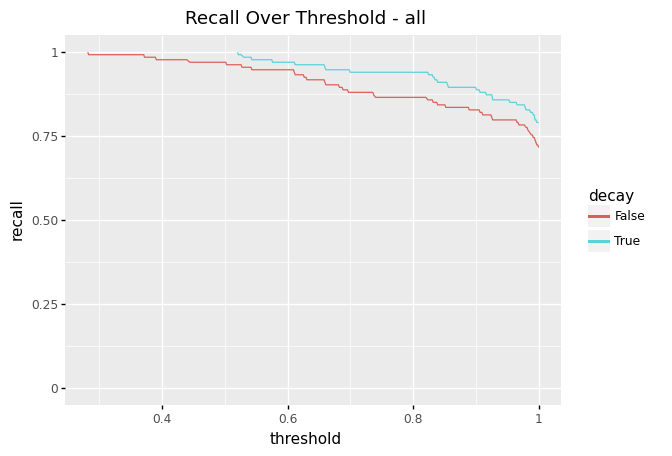

/tmp/ipykernel_22539/4074180442.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_22539/4074180442.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_22539/4074180442.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_22539/4074180442.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_22539/4074180442.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


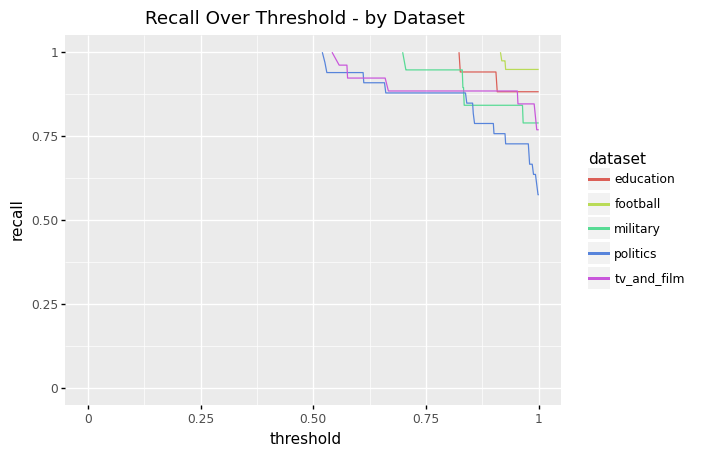

In [20]:
#no decay:
precision,recall,threshold = precision_recall_curve(df['isSemanticRoleMatch'],df['compatibilityPercentageDecay'])
lowestThreshold = threshold[0]
noRecallDf = df[df['compatibilityPercentageDecay']<lowestThreshold]
print("No Single true role match for below (with decay) ",lowestThreshold,"found in ",len(noRecallDf.index),"elements")
plotDF = pd.DataFrame({'recall': recall[0:len(recall)-1], 'threshold':threshold,"decay":True})
#decay:
precision,recall,threshold = precision_recall_curve(df['isSemanticRoleMatch'],df['compatibilityPercentageNoDecay'])
lowestThreshold = threshold[0]
noRecallDf = df[df['compatibilityPercentageNoDecay']<lowestThreshold]
print("No Single true role match for below (without decay) ",lowestThreshold,"found in ",len(noRecallDf.index),"elements")
plotDF2 = pd.DataFrame({'recall': recall[0:len(recall)-1], 'threshold':threshold,"decay":False})
finalPlotDF = plotDF.append(plotDF2)
plot = ggplot(finalPlotDF,aes(x = 'threshold',y='recall',color="decay",group="decay")) + geom_line() + ylim(0, 1) + ggtitle("Recall Over Threshold - all")
print(plot)
#for every dataset:

finalDF = pd.DataFrame()
for ds in df.dataset.unique():
    thisDF = df[df['dataset']==ds]
    precision,recall,threshold = precision_recall_curve(thisDF['isSemanticRoleMatch'],thisDF['compatibilityPercentageDecay'])
    plotDF = pd.DataFrame({'recall': recall[0:len(recall)-1], 'threshold':threshold,'dataset':ds})
    finalDF = finalDF.append(plotDF)
plot = ggplot(finalDF,aes(x = 'threshold',y='recall',group="dataset",color="dataset")) + geom_line() + xlim(0, 1) + ylim(0, 1) + ggtitle("Recall Over Threshold - by Dataset")
print(plot)